In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\The Sharma Classes\Downloads\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
for i in data.columns:
    print(i,':','\n',data[i].unique(),'\n')

CustomerID : 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200] 

Gender : 
 ['Male' 'Female'] 

Age : 
 [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 

In [8]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

data = data.drop('CustomerID', axis=1)

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [10]:
data['Income_per_Age'] = data['Annual Income (k$)'] / data['Age']

data['Gender_Score'] = data['Gender'] * data['Spending Score (1-100)']

In [11]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_per_Age,Gender_Score
0,1,19,15,39,0.789474,39
1,1,21,15,81,0.714286,81
2,0,20,16,6,0.800000,0
3,0,23,16,77,0.695652,0
4,0,31,17,40,0.548387,0


[]

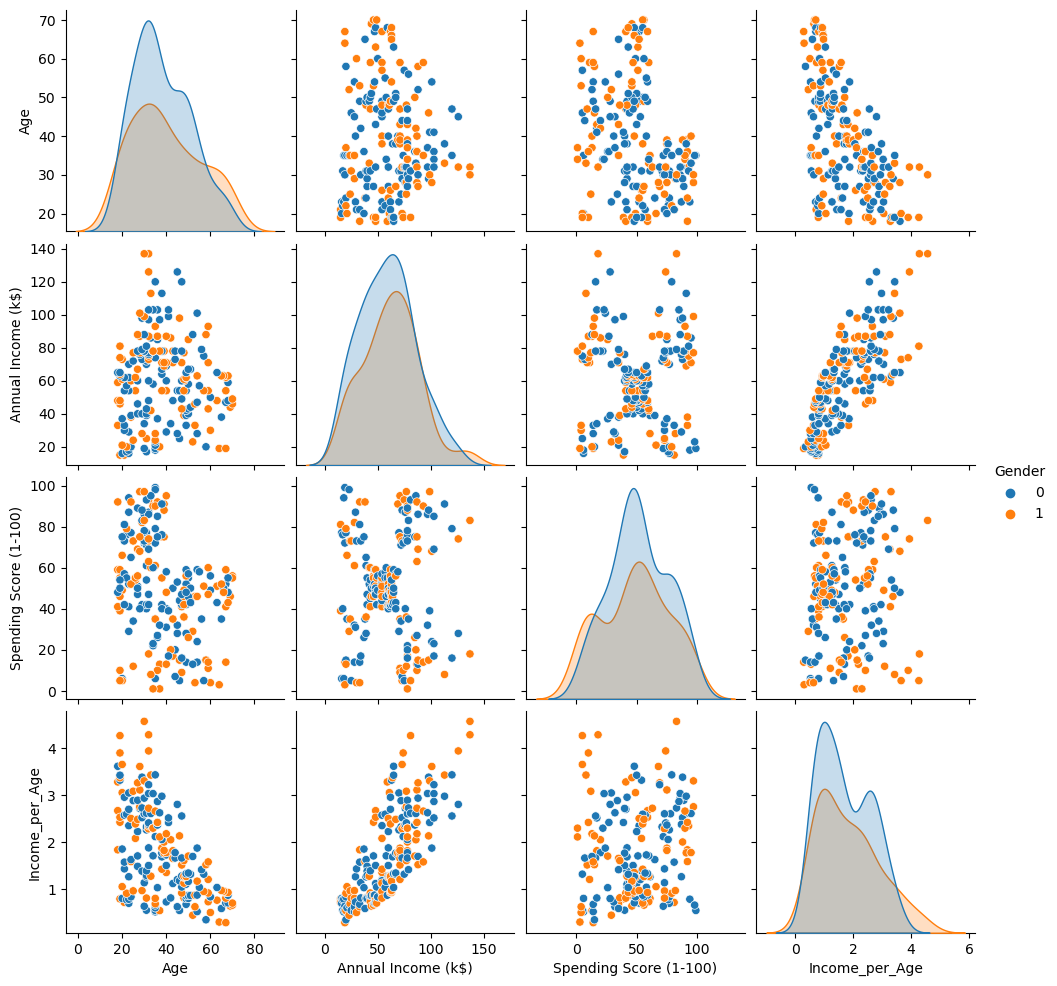

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_per_Age', 'Gender']], hue='Gender')
plt.plot()

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

import pandas as pd
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_per_Age,Gender_Score
0,1.128152,-1.424569,-1.738999,-0.434801,-1.010344,0.582576
1,1.128152,-1.281035,-1.738999,1.195704,-1.089296,1.968484
2,-0.886405,-1.352802,-1.700830,-1.715913,-0.999291,-0.704338
3,-0.886405,-1.137502,-1.700830,1.040418,-1.108862,-0.704338
4,-0.886405,-0.563369,-1.662660,-0.395980,-1.263499,-0.704338


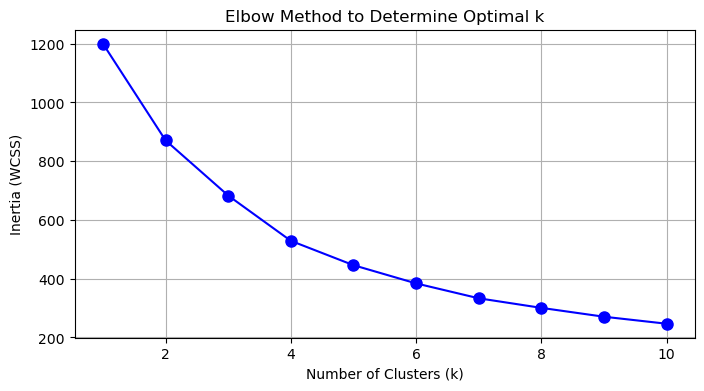

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []                          
k_range = range(1, 11)                

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(scaled_df)                           
    inertia.append(kmeans.inertia_)                 

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-', markersize=8)  
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

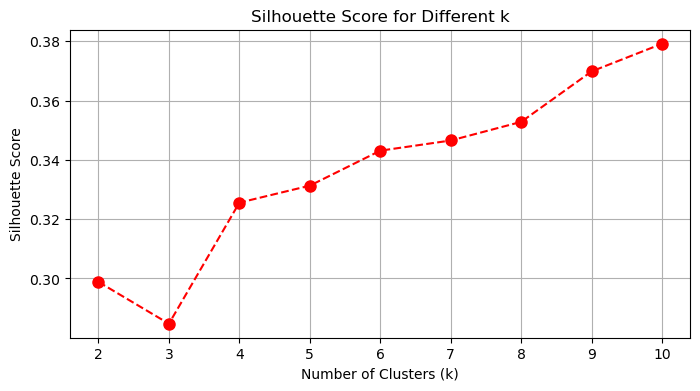

In [15]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)  
    silhouette_scores.append(score) 

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'ro--', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)
plt.show()

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(scaled_df)
data['Cluster'] = kmeans.labels_
scaled_df['Cluster'] = kmeans.labels_
print(kmeans.inertia_) 

446.17688990425165


In [17]:
cluster_profile = data.groupby('Cluster').mean(numeric_only=True)
cluster_profile

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_per_Age,Gender_Score
Cluster,,,,,,
0,1.000000,28.315789,64.131579,72.815789,2.282674,72.815789
1,0.000000,28.382353,76.588235,68.882353,2.720038,0.000000
2,1.000000,54.151515,47.121212,39.484848,0.890083,39.484848
3,0.548387,40.419355,90.000000,15.741935,2.403069,6.419355
4,0.000000,42.015625,42.593750,49.062500,1.050631,0.000000


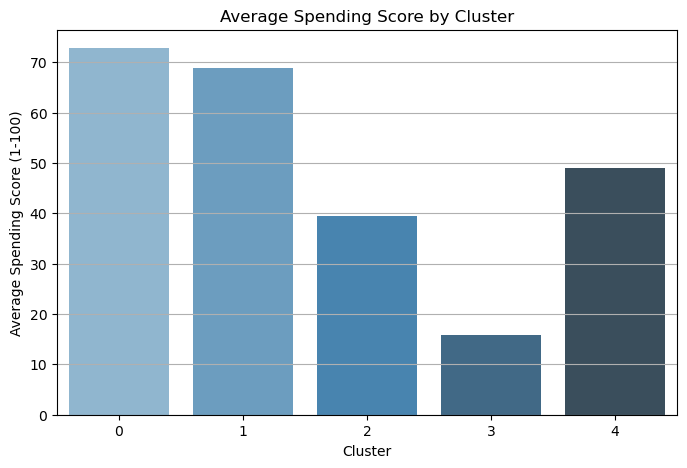

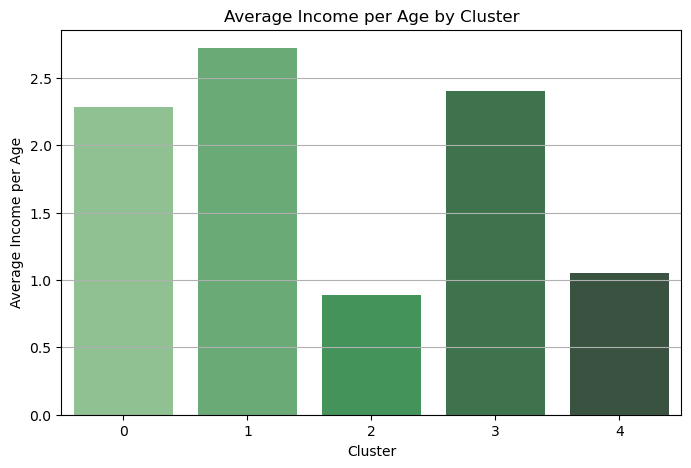

In [21]:
import seaborn as sns

# Reset index
data = cluster_profile.reset_index()

# Plot 1: Spending Score
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Cluster', y='Spending Score (1-100)', palette='Blues_d')
plt.title('Average Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score (1-100)')
plt.grid(axis='y')
plt.show()

# Plot 2: Income per Age
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Cluster', y='Income_per_Age', palette='Greens_d')
plt.title('Average Income per Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income per Age')
plt.grid(axis='y')
plt.show()


# Cluster-wise Analysis
<pre><b>Cluster 0
- Young males (~28 years), decent income (~64k), and very high spending (~73).

- High Income_per_Age → financially strong young men.

- Marketing Insight: Likely impulse buyers or luxury spenders. Ideal for premium products.

Cluster 1
- Young females (~28 years), higher income (~76k), and high spending (~69).

- Highest Income_per_Age of all clusters.

- Marketing Insight: Affluent female buyers, excellent targets for luxury and lifestyle brands.

Cluster 2
- Older males (~54 years), lower spending (~39) despite moderate income (~47k).

- Low Income_per_Age.

- Marketing Insight: Conservative spenders. Might respond to need-based or value-driven campaigns.

Cluster 3
- Middle-aged mix gender group (~40 years), highest income (90k) but lowest spending (~16).

- High Income_per_Age but low Gender_Score → conservative with high income.

- Marketing Insight: Possibly focused on saving/investments. May need strong incentive to spend.

Cluster 4
- Middle-aged females (~42 years), lowest income (~42k), and moderate spending (~49).

- Low Income_per_Age, Gender_Score = 0 (females).

- Marketing Insight: Budget-conscious segment. Offers and discounts may work better.
</pre>